In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle, analysis as ana
from matplotlib.pyplot import *

In [2]:
def plots(fltr,ytype,mtype,mb,dtype,cmask,form='{:.2f}'):
    s = mb.bc**2/2/np.pi
    p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
    qtau, qlen, qsrc, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
    fxtau = tools_y.init_cross(qtau,cy,p.ids,p.stag)
    fxtbh = tools_y.init_cross(qtbh,cy,p.ids,'bh_'+p.stag)
    fxtBH = tools_y.init_cross(qtBH,cy,p.ids,'BH_'+p.stag)
    pl.plot_1dstyle(ymin=-1e-8,ymax=1e-8,ylab=r'$L^2C_L^{\tau y}/2\pi$')
    for xobj, Lab in [(fxtau,'tau'),(fxtbh,'bh'),(fxtBH,'BH')]:
        mcb, vcb, scb, ocb = bn.binned_spec(mb,xobj.xl,cn=1)
        errorbar(mb.bc,s*ocb,yerr=s*vcb,fmt='o',label=Lab)
    axhline(0.,color='k',ls='--')
    st = ana.PTEs(ocb,scb,comment=ytype+','+str(mtype),x1pte=True)
    figtext(.2,.20,'ymap:'+ytype+','+str(mtype))
    figtext(.2,.25,'tau:'+dtype+','+str(cmask))
    figtext(.2,.30,r'$\chi$-PTE:'+str(form.format(st.px1)))
    figtext(.2,.35,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
    legend()
    show()

In [3]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

chi: 0.4 , chi (sim): -0.0 , PTE: 0.80 (nilc,0)
chi^2: 11.4 , chi^2 (sim): 11.2 , PTE: 0.37 (nilc,0)


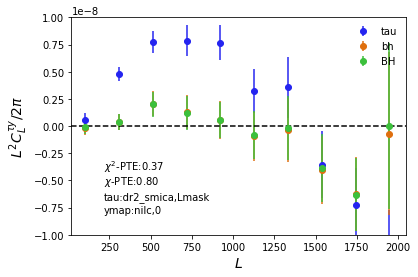

chi: -1.3 , chi (sim): -0.0 , PTE: 0.68 (nilc,1)
chi^2: 5.0 , chi^2 (sim): 11.2 , PTE: 0.90 (nilc,1)


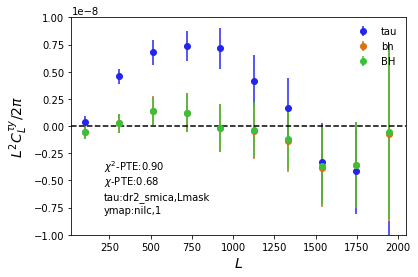

chi: -0.9 , chi (sim): 0.0 , PTE: 0.80 (milca,0)
chi^2: 10.5 , chi^2 (sim): 11.2 , PTE: 0.42 (milca,0)


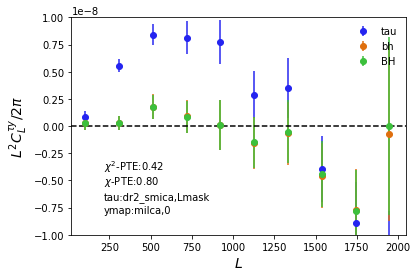

chi: -2.9 , chi (sim): 0.0 , PTE: 0.44 (milca,1)
chi^2: 5.8 , chi^2 (sim): 11.1 , PTE: 0.88 (milca,1)


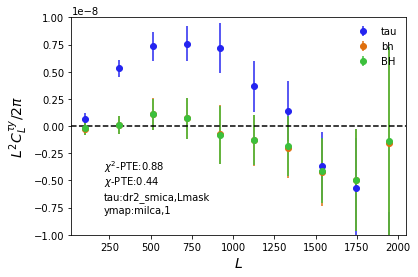

chi: 0.9 , chi (sim): 0.0 , PTE: 0.76 (nilc,0)
chi^2: 14.0 , chi^2 (sim): 11.1 , PTE: 0.24 (nilc,0)


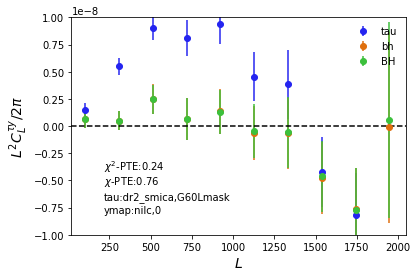

chi: -1.5 , chi (sim): -0.0 , PTE: 0.62 (nilc,1)
chi^2: 5.3 , chi^2 (sim): 11.1 , PTE: 0.90 (nilc,1)


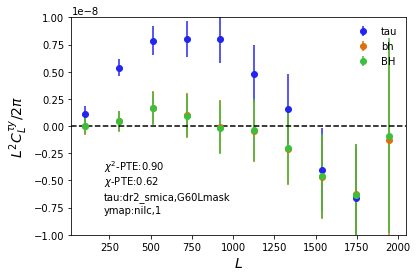

chi: -0.4 , chi (sim): 0.0 , PTE: 0.92 (milca,0)
chi^2: 13.3 , chi^2 (sim): 11.2 , PTE: 0.30 (milca,0)


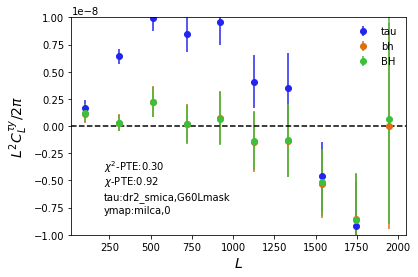

chi: -2.5 , chi (sim): 0.0 , PTE: 0.42 (milca,1)
chi^2: 7.7 , chi^2 (sim): 11.1 , PTE: 0.73 (milca,1)


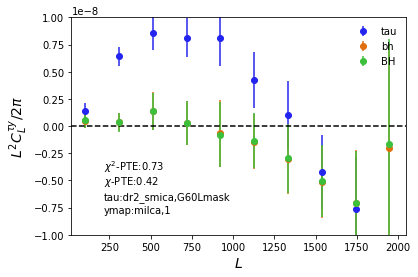

In [4]:
#for fltr in ['none','cinv']:
for fltr in ['none']:
    for dtype in ['dr2_smica']:
        for cmask in ['Lmask','G60Lmask']:
            for ytype in ['nilc','milca']:
                for mtype in [0,1]:
                    plots(fltr,ytype,mtype,mb,dtype,cmask)

In [ ]:
cov = np.cov(scb[1:,:],rowvar=0)
dcov = np.diag(1./np.sqrt(np.diag(cov)))
corr = np.matmul(np.matmul(dcov,cov),dcov)
print(corr)

In [ ]:
pl.plot_corr(corr,b[:10]*3)